In [1]:
import os
import pandas as pd
import numpy as np

In [ ]:
 The Earth acceleration is the accelerometer measurement in the Earth coordinate frame with the 1 g of gravity removed.

In [2]:
dfs = []
fname = '/home/naveenb/vital_ws/EP6/EP6_multimodal_barun/multimodal_integration/ble/data/Result_BLE_DATA_July_02_2_slice_final.csv'

data = pd.read_csv(fname, sep=",", header=None, names=["Time", "ID", "RSSI", "PI"])


In [20]:

fname = '/home/naveenb/vital_ws/EP6/EP6_multimodal_barun/multimodal_integration/ble/data/Result_BLE_DATA_July_02_2_slice_final.csv'

# Read the CSV file
d_ble = pd.read_csv(fname, sep=",", header=None, names=["location", "rooms", "Time_loc", "x", "y", "x_smoothed", "y_smoothed"])

# Display the output
d_ble.drop(d_ble.head(1).index,inplace=True)

In [22]:
from pprint import pprint
pprint(d_ble)

                                    location             rooms  \
1                                 (922, 729)            Lounge   
2                                (1193, 801)                RC   
3                            (1173.2, 739.8)                RC   
4                (849.08, 538.9200000000001)  Transition Zones   
5              (1035.632, 634.9680000000001)  Transition Zones   
6                      (1110.2528, 673.3872)                RC   
7             (916.3011200000001, 688.75488)            Lounge   
8     (911.3204479999999, 694.9019519999999)            Lounge   
9                 (875.1281792, 801.7607808)  Transition Zones   
10         (783.25127168, 860.7043123200001)  Transition Zones   
11        (682.300508672, 832.0817249280001)                LC   
12       (660.5202034688, 745.6326899712001)                LC   
13        (707.00808138752, 835.85307598848)                LC   
14    (473.00323255500797, 571.941230395392)  Transition Zones   
15   (338.

In [26]:
# Convert Timeloc to datetime
d_ble['Time_loc'] = pd.to_datetime(d_ble['Time_loc'])

# Calculate the time difference from the first timestamp in seconds
d_ble['Time_sec'] = (d_ble['Time_loc'] - d_ble['Time_loc'].iloc[0]).dt.total_seconds()


In [27]:
d_ble['Time_sec']

1        0.0
2       45.0
3      180.0
4      270.0
5      315.0
6      360.0
7      495.0
8      540.0
9      585.0
10     630.0
11     675.0
12     720.0
13     765.0
14     945.0
15     990.0
16    1035.0
17    1080.0
18    1125.0
19    1170.0
20    1215.0
21    1260.0
22    1305.0
23    1350.0
24    1395.0
25    1440.0
26    1485.0
27    1530.0
28    1575.0
29    1620.0
30    1665.0
31    1710.0
32    1845.0
33    1935.0
34    2070.0
35    2115.0
36    2160.0
37    2205.0
38    2295.0
39    2340.0
40    2385.0
41    2430.0
42    2475.0
43    2520.0
44    2565.0
45    2610.0
46    2655.0
47    2700.0
48    2745.0
49    2790.0
50    2835.0
51    2880.0
Name: Time_sec, dtype: float64

In [ ]:
# final=20:40:30 #initial 19:52:30 #total=48 mins
# 2880  =  814+1766+300

In [28]:
2880-1766-300

814

In [3]:
fname = '/home/naveenb/vital_ws/EP6/EP6_multimodal_barun/multimodal_integration/ble/data/Result_IMU_data_july_02_proc_kush_2.csv'
# Read the CSV file
d_imu = pd.read_csv(fname, sep=",", header=None, names=["Timestamp", 
                                                        "Acceleration_x", "Acceleration_y", "Acceleration_z",
                                                        "IsMoving", "Euler_x", "Euler_y", "Euler_z",
                                                       "Velocity_x","Velocity_y","Velocity_z",
                                                       "Velocity_new_x", "Velocity_new_y", "Velocity_new_z",
                                                       "Position_x", "Position_y", "Position_z"])

d_imu.drop(d_imu.head(1).index,inplace=True)
# Display the output
#print(d_imu)

<ipython-input-3-d9606211710f>:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  d_imu = pd.read_csv(fname, sep=",", header=None, names=["Timestamp",


In [30]:
d_imu['Time_sec'] = d_imu['Timestamp'].astype(float)+815
d_imu['Time_sec']

1         815.000000
2         815.044060
3         815.087494
4         815.131665
5         815.175125
            ...     
40296    2581.007033
40297    2581.050837
40298    2581.094632
40299    2581.138150
40300    2581.181986
Name: Time_sec, Length: 40300, dtype: float64

In [23]:
d_imu['Timestamp'] #29.4 minutes

1                0.0
2            0.04406
3           0.087494
4           0.131665
5           0.175125
            ...     
40296    1766.007033
40297    1766.050837
40298    1766.094632
40299     1766.13815
40300    1766.181986
Name: Timestamp, Length: 40300, dtype: object

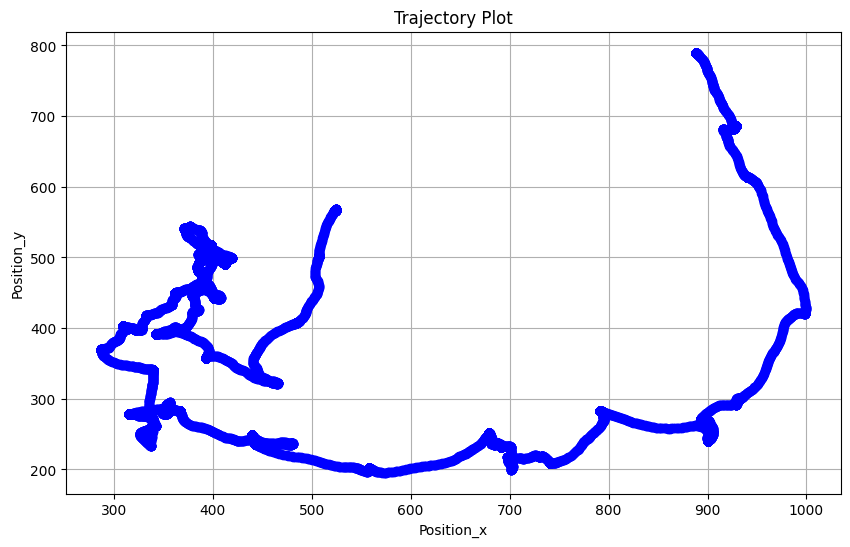

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#d_imu["Position_x"]
# Convert dataframe columns to numpy arrays
d_imu['Position_x'] = d_imu['Position_x'].astype(float)
d_imu['Position_y'] = d_imu['Position_y'].astype(float)

position_x = d_imu['Position_x'].to_numpy()/33.4772*(955 - 130) 
position_y = d_imu['Position_y'].to_numpy()/33.4772*(955 - 130)

position_x = position_x + 525 #(712, 590)
position_y = position_y + 569 #(712, 590)
# Plot the trajectory
plt.figure(figsize=(10, 6))
plt.plot(position_x, position_y, marker='o', linestyle='-', color='b')
plt.title('Trajectory Plot')
plt.xlabel('Position_x')
plt.ylabel('Position_y')
plt.grid(True)
plt.show()

In [6]:
position_x

array(['0.0', '0.00041833289866789573', '0.00028871537708559104', ...,
       14.741187165344384, 14.741187165344384, 14.741187165344384],
      dtype=object)

In [ ]:
for t in range(full_timestamp):
    x_imu_t, y_imu_t = delta_x_imu + x_imu_ble, delta_y_imu + y_imu_ble
    if ble[t]:
        x_imu_ble, y_imu_ble = 0.5*(x_imu_t + x_ble_t), 0.5*(x_imu_t + x_ble_t)

In [ ]:
# 1. Convert imu to ble scale
# 3. Do the imu_ekf....,';'

In [ ]:
Err = []

for i in range(0, len(df_GT)):
    Err.append(computeDistance((dfp['X'][i], dfp['Y'][i]), (df_GT['X'][i], df_GT['Y'][i])))
    
AveErr = np.mean(Err) * 33.4772/(955 - 130) # Change it into the meter
# AveErr = np.mean(Err) * 33.4772/1144 # Change it into the meter
print(AveErr)

In [ ]:
Err = []

for i in range(0, min(len(df_GT), len(dfI))):
    Err.append(computeDistance((dfI['X'][i], dfI['Y'][i]), (df_GT['X'][i], df_GT['Y'][i])))
    
AveErr = np.mean(Err) * 33.4772/(955 - 130) # Change it into the meter
# AveErr = np.mean(Err) * 33.4772/1144 # Change it into the meter
print(AveErr)

<ipython-input-16-da0dd90855da>:3: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  locations = np.loadtxt(


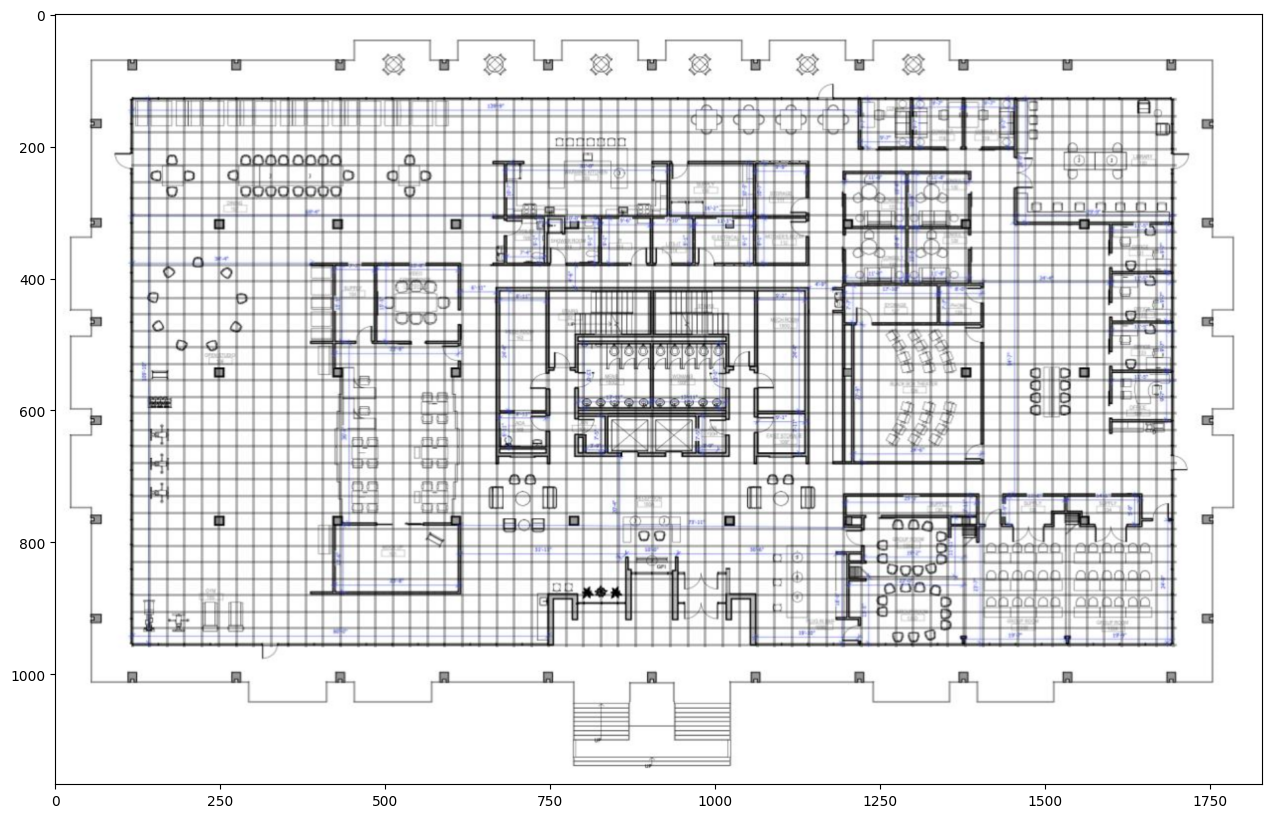

In [16]:
import cv2
# Loading Pi X and Y Locations on Map
locations = np.loadtxt(
        "PiLocations.csv",
        delimiter=",",
        dtype={"names": ("Pi", "X", "Y"), "formats": ("i", "i", "i")},
        skiprows=1,)
    
Pi, X, Y = [], [], []

for location in locations:
    Pi.append(location[0])
    X.append(location[1])
    Y.append(location[2])
    
data = {'Pi': Pi, 'X': X, 'Y': Y}
df = pd.DataFrame(data)



img = cv2.imread("ep6_floorplan_measured_half_gridded_1_meter.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (610*3, 389*3))
image = img

"can u plot the trajectory on the image and show  plt.plot(position_x, position_y, marker='o', linestyle='-', color='b')"

plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

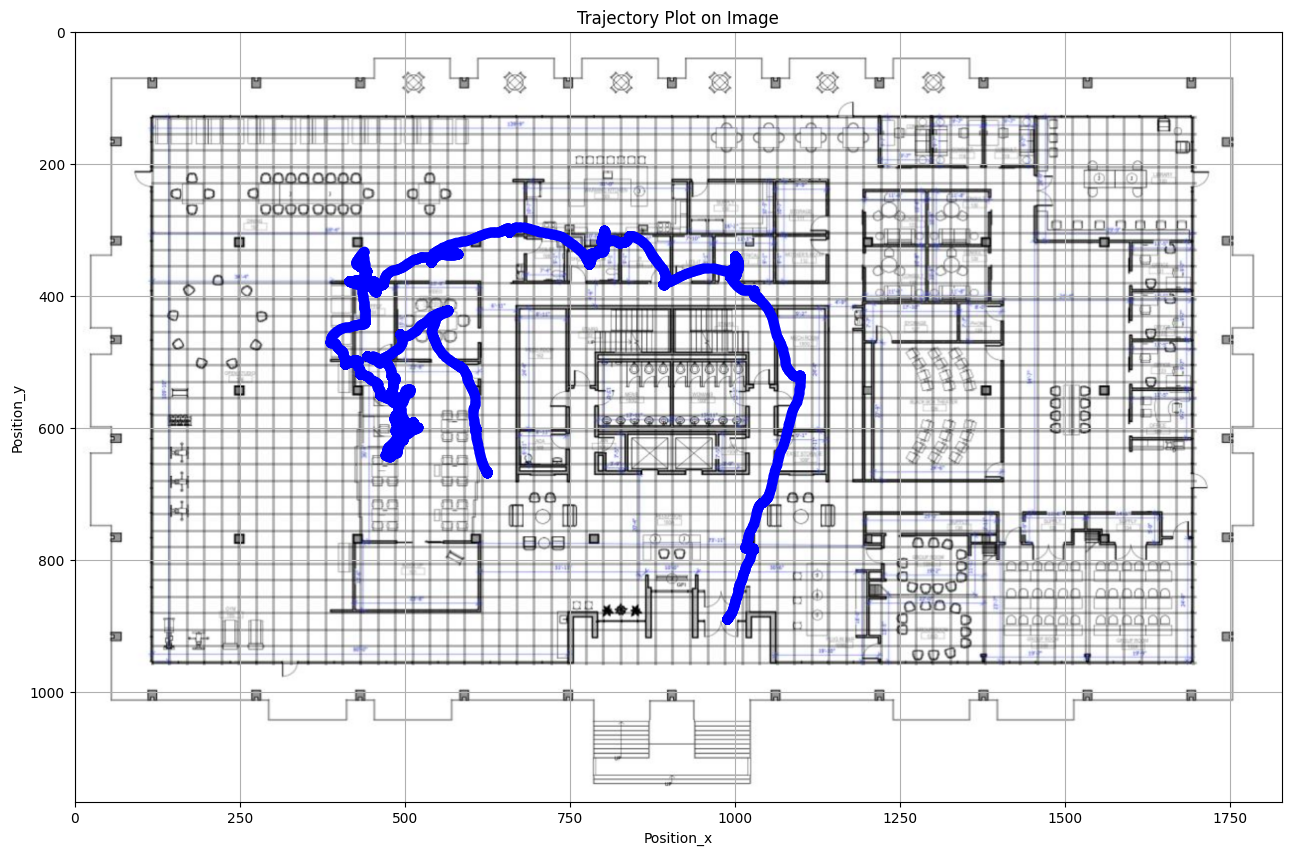

In [127]:
# Plot the trajectory on the image

position_x = d_imu['Position_x'].to_numpy()/33.4772*(955 - 130) 
position_y = d_imu['Position_y'].to_numpy()/33.4772*(955 - 130)

position_x = position_x + 625 #(712, 590)
position_y = position_y + 669 #(712, 590)

plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.plot(position_x, position_y, marker='o', linestyle='-', color='b')
plt.title('Trajectory Plot on Image')
plt.xlabel('Position_x')
plt.ylabel('Position_y')
plt.grid(True)
plt.show()

In [41]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter

d_imu['Time_sec'] = d_imu['Time_sec'].astype(float)
d_imu['Velocity_new_x'] = d_imu['Velocity_new_x'].astype(float)
d_imu['Velocity_new_y'] = d_imu['Velocity_new_y'].astype(float)
d_ble['Time_sec'] = d_ble['Time_sec'].astype(float)
d_ble['x_smoothed'] = d_ble['x_smoothed'].astype(float)
d_ble['y_smoothed'] = d_ble['y_smoothed'].astype(float)

dataframe_ble = d_ble[['Time_sec', 'x_smoothed', 'y_smoothed']].copy()
dataframe_imu = d_imu[['Time_sec', 'Velocity_new_x', 'Velocity_new_y']].copy()



# Merge the two dataframes based on timestamps, using interpolation for missing values
combined_df = pd.merge_asof(dataframe_ble.sort_values('Time_sec'), 
                            dataframe_imu.sort_values('Time_sec'), 
                            on='Time_sec', 
                            direction='nearest')

# Fill any NaN values (if any) that might result from merging
combined_df = combined_df.interpolate(method='linear')

# Ensure all required columns are present
combined_df = combined_df[['Time_sec', 'x_smoothed', 'y_smoothed', 'Velocity_new_x', 'Velocity_new_y']]

# Combine position and velocity into a single array
observations = combined_df[['x_smoothed', 'y_smoothed', 'Velocity_new_x', 'Velocity_new_y']].values

# Specify parameters for the Kalman Filter
transition_matrix = [[1, 0, 1, 0],
                     [0, 1, 0, 1],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]]

transition_covariance = np.eye(4) * 0.05

# Observation matrix includes both position and velocity observations
observation_matrix = [[1, 0, 0, 0],
                      [0, 1, 0, 0],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]]

observation_covariance = [[1, 0, 0, 0],
                      [0, 1, 0, 0],
                      [0, 0, 0.01, 0],
                      [0, 0, 0, 0.01]]

# Initial state mean includes initial positions and velocities
initial_state_mean = [combined_df['x_smoothed'].values[0], 
                      combined_df['y_smoothed'].values[0], 
                      combined_df['Velocity_new_x'].values[0], 
                      combined_df['Velocity_new_y'].values[0]]

initial_state_covariance = np.eye(4)

# Initialize Kalman Filter
kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix,
    initial_state_mean=initial_state_mean,
    initial_state_covariance=initial_state_covariance,
    observation_covariance=observation_covariance,
    transition_covariance=transition_covariance
)

# Apply Kalman Filter
state_means, state_covariances = kf.filter(observations)

# Extract smoothed trajectories
combined_df['x_kf'] = state_means[:, 0]
combined_df['y_kf'] = state_means[:, 1]
combined_df['vx_kf'] = state_means[:, 2]
combined_df['vy_kf'] = state_means[:, 3]

In [61]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter

d_imu['Time_sec'] = d_imu['Time_sec'].astype(float)
d_imu['Velocity_new_x'] = d_imu['Velocity_new_x'].astype(float)
d_imu['Velocity_new_y'] = d_imu['Velocity_new_y'].astype(float)
d_ble['Time_sec'] = d_ble['Time_sec'].astype(float)
d_ble['x_smoothed'] = d_ble['x_smoothed'].astype(float)
d_ble['y_smoothed'] = d_ble['y_smoothed'].astype(float)

dataframe_ble = d_ble[['Time_sec', 'x_smoothed', 'y_smoothed']].copy()
dataframe_imu = d_imu[['Time_sec', 'Velocity_new_x', 'Velocity_new_y']].copy()

# Ensure timestamps are sorted
dataframe_ble = dataframe_ble.sort_values('Time_sec').reset_index(drop=True)
dataframe_imu = dataframe_imu.sort_values('Time_sec').reset_index(drop=True)

# Initialize Kalman Filter parameters
transition_matrix = np.array([[1, 0, 1, 0],
                              [0, 1, 0, 1],
                              [0, 0, 1, 0],
                              [0, 0, 0, 1]])

transition_covariance = np.eye(4) * 0.05

observation_matrix_position = np.array([[1, 0, 0, 0],
                                        [0, 1, 0, 0]])

observation_matrix_velocity = np.array([[0, 0, 1, 0],
                                        [0, 0, 0, 1]])

observation_covariance_position = np.eye(2) * 0.5
observation_covariance_velocity = np.eye(2) * 0.5

initial_state_mean = np.array([dataframe_ble['x_smoothed'].values[0], 
                      dataframe_ble['y_smoothed'].values[0], 
                      dataframe_imu['Velocity_new_x'].values[0], 
                      dataframe_imu['Velocity_new_y'].values[0]])

initial_state_covariance = np.eye(4)

# Initialize Kalman Filter
kf = KalmanFilter(
    observation_matrices=observation_matrix_position,
    initial_state_mean=initial_state_mean,
    initial_state_covariance=initial_state_covariance,
    transition_covariance=transition_covariance
)

state_means = []
state_covariances = []
current_state_mean = initial_state_mean
current_state_covariance = initial_state_covariance

# Combine BLE and IMU data based on timestamp
combined_data = pd.concat([dataframe_ble, dataframe_imu]).sort_values(by='Time_sec').reset_index(drop=True)

previous_timestamp = combined_data['Time_sec'].iloc[0]

for i, row in combined_data.iterrows():
    current_timestamp = row['Time_sec']
    dt = (current_timestamp - previous_timestamp)
    previous_timestamp = current_timestamp
    
    # Update the transition matrix to account for the time step
    transition_matrix = np.array([[1, 0, dt, 0],
                                  [0, 1, 0, dt],
                                  [0, 0, 1, 0],
                                  [0, 0, 0, 1]])
    # Update Kalman Filter's transition matrix
    kf.transition_matrices = transition_matrix
    #if 'x_smoothed' in row and 'y_smoothed' in row:
    if not (np.isnan(row['x_smoothed']) and np.isnan(row['y_smoothed'])):
        # BLE observation
        observation = np.array([row['x_smoothed'], row['y_smoothed']])
        #print(observation)
        current_state_mean, current_state_covariance = kf.filter_update(
            current_state_mean, 
            current_state_covariance, 
            observation=observation, 
            observation_matrix=observation_matrix_position,
            observation_covariance=observation_covariance_position
        )
    #if 'Velocity_new_x' in row and 'Velocity_new_y' in row:
    if not (np.isnan(row['Velocity_new_x']) and np.isnan(row['Velocity_new_y'])):
        # IMU observation
        observation = np.array([row['Velocity_new_x'], row['Velocity_new_y']])/33.4772*(955 - 130) 
        current_state_mean, current_state_covariance = kf.filter_update(
            current_state_mean, 
            current_state_covariance, 
            observation=observation, 
            observation_matrix=observation_matrix_velocity,
            observation_covariance=observation_covariance_velocity
        )
    
    
    state_means.append(current_state_mean)
    state_covariances.append(current_state_covariance)

# Convert results to DataFrame

# Extract smoothed trajectories
# Convert results to DataFrame
state_means = np.array(state_means)
#combined_df['x_kf'] = state_means[:, 0]
#combined_df['y_kf'] = state_means[:, 1]
#combined_df['vx_kf'] = state_means[:, 2]
#combined_df['vy_kf'] = state_means[:, 3]

In [123]:


current_state_mean = initial_state_mean


initial_state_mean = np.array([dataframe_ble['x_smoothed'].values[0], 
                      dataframe_ble['y_smoothed'].values[0], 
                      dataframe_imu['Velocity_new_x'].values[0], 
                      dataframe_imu['Velocity_new_y'].values[0]])


previous_timestamp = combined_data['Time_sec'].iloc[0]


x_imu_ble = dataframe_ble['x_smoothed'].values[0]
y_imu_ble = dataframe_ble['y_smoothed'].values[0]
state_means = []

for i, row in combined_data.iterrows():
    current_timestamp = row['Time_sec']
    dt = (current_timestamp - previous_timestamp)
    previous_timestamp = current_timestamp
    if not (np.isnan(row['x_smoothed']) and np.isnan(row['y_smoothed'])):
        # BLE observation
        x_ble = row['x_smoothed']
        y_ble = row['y_smoothed']
        x_del_imu = 0
        y_del_imu = 0
            #observation = np.array([row['x_smoothed'], row['y_smoothed']]).reshape(-1, 1)
            #xEst, PEst = kalman_filter(xEst, PEst, observation, np.zeros((2, 1)), dt, observation_model_position, R_position)
    if not (np.isnan(row['Velocity_new_x']) and np.isnan(row['Velocity_new_y'])):
        # IMU observation         
        x_del_imu = x_del_imu + dt*row['Velocity_new_x']/33.4772*(955 - 130)
        y_del_imu = y_del_imu + dt*row['Velocity_new_y']/33.4772*(955 - 130)

            #observation = np.array([row['Velocity_new_x'], row['Velocity_new_y']]).reshape(-1, 1)/33.4772*(955 - 130) 
            #xEst, PEst = kalman_filter(xEst, PEst, observation, np.zeros((2, 1)), dt, observation_model_velocity, R_velocity)
    x_imu = x_del_imu + x_imu_ble
    y_imu = y_del_imu + y_imu_ble
    
    k=0.5
    x_imu_ble = k*(x_imu) + (1.0-k)*x_ble
    y_imu_ble = k*(y_imu) + (1.0-k)*y_ble
    
    state_means.append([x_imu_ble, y_imu_ble])

    
    
state_means = np.array(state_means)
# for t in range(full_timestamp):
#     x_imu_t, y_imu_t = delta_x_imu + x_imu_ble, delta_y_imu + y_imu_ble
#     if ble[t]:
#         x_imu_ble, y_imu_ble = 0.5*(x_imu_t + x_ble_t), 0.5*(x_imu_t + x_ble_t)

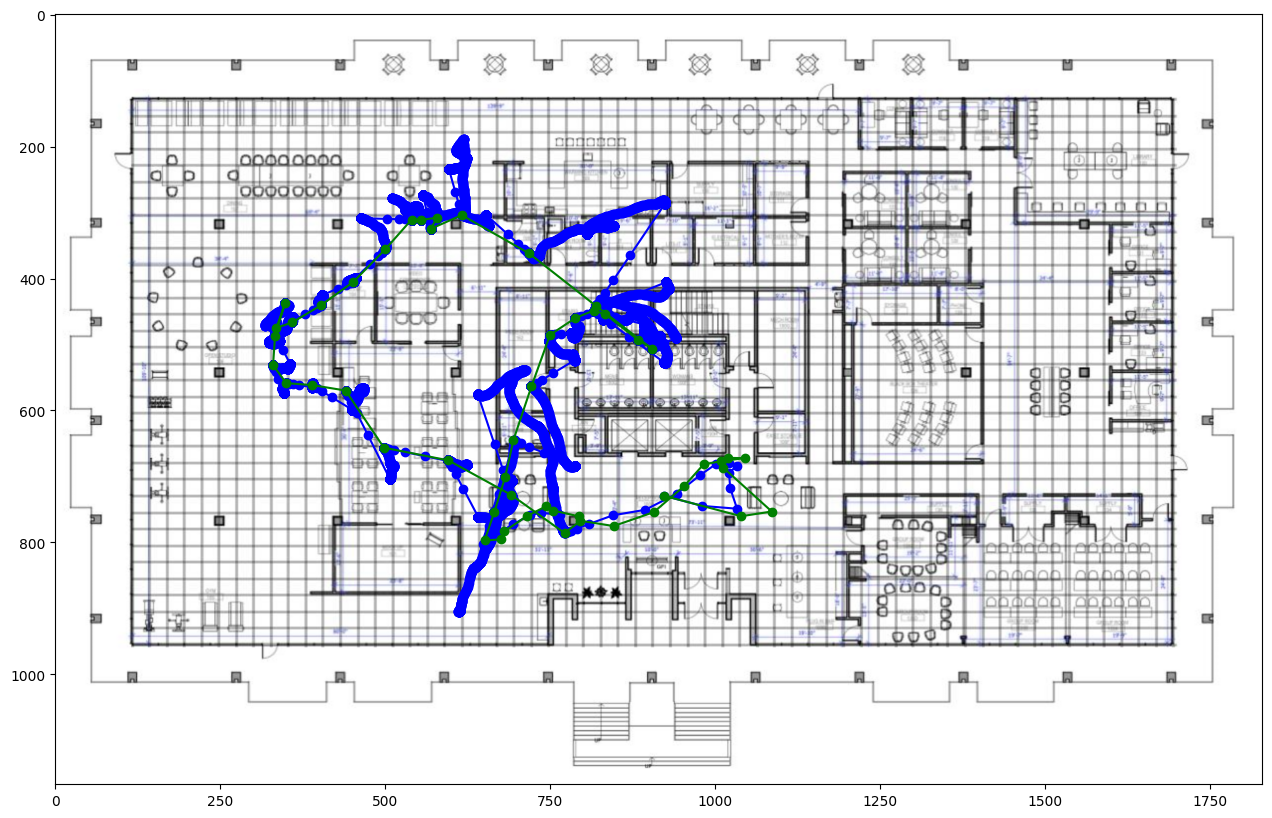

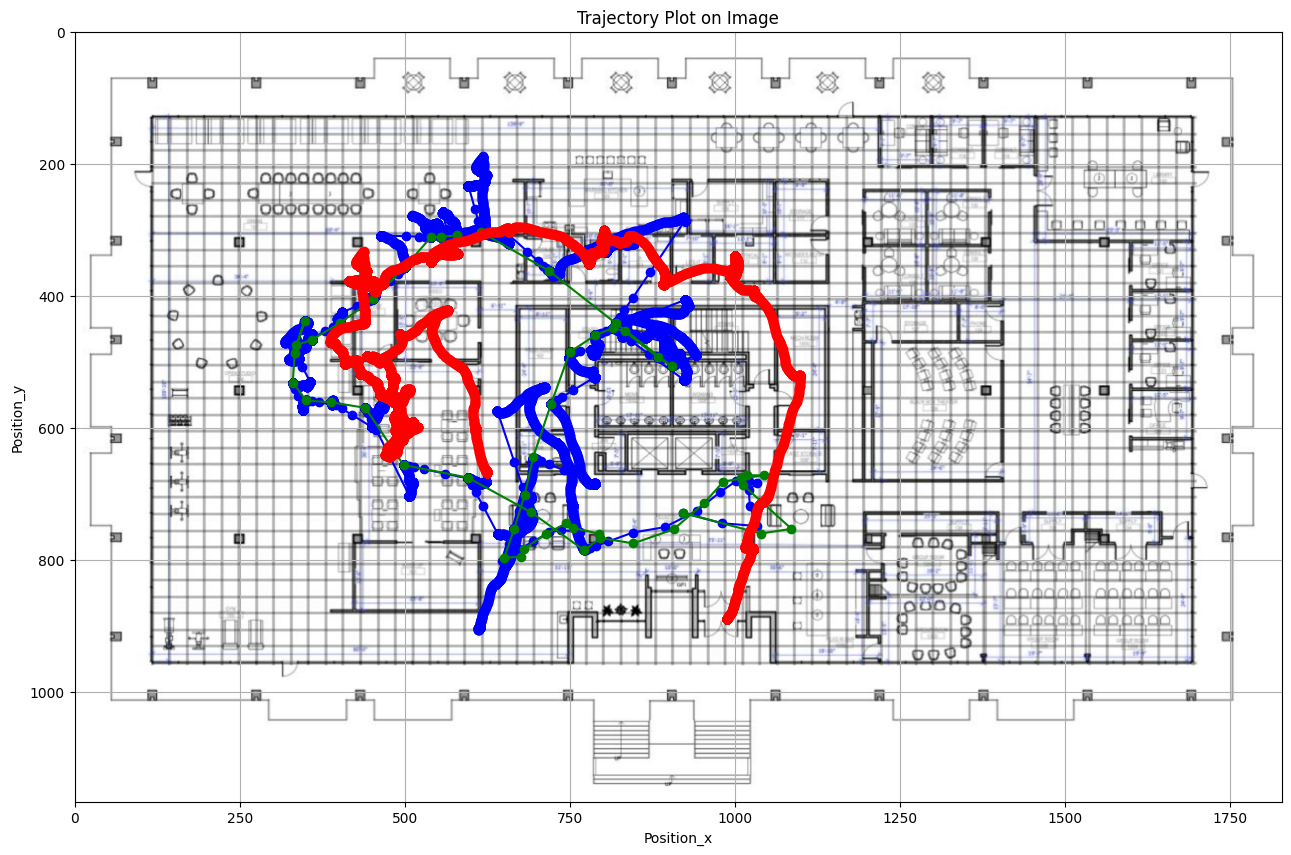

In [129]:
state_means = np.array(state_means)

plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.plot(state_means[:, 0], state_means[:, 1], marker='o', linestyle='-', color='b')
plt.plot(dataframe_ble['x_smoothed'], dataframe_ble['y_smoothed'], marker='o', linestyle='-', color='g')
plt.plot(position_x, position_y, marker='o', linestyle='-', color='r')
plt.title('Trajectory Plot on Image')
plt.xlabel('Position_x')
plt.ylabel('Position_y')
plt.grid(True)
plt.show()

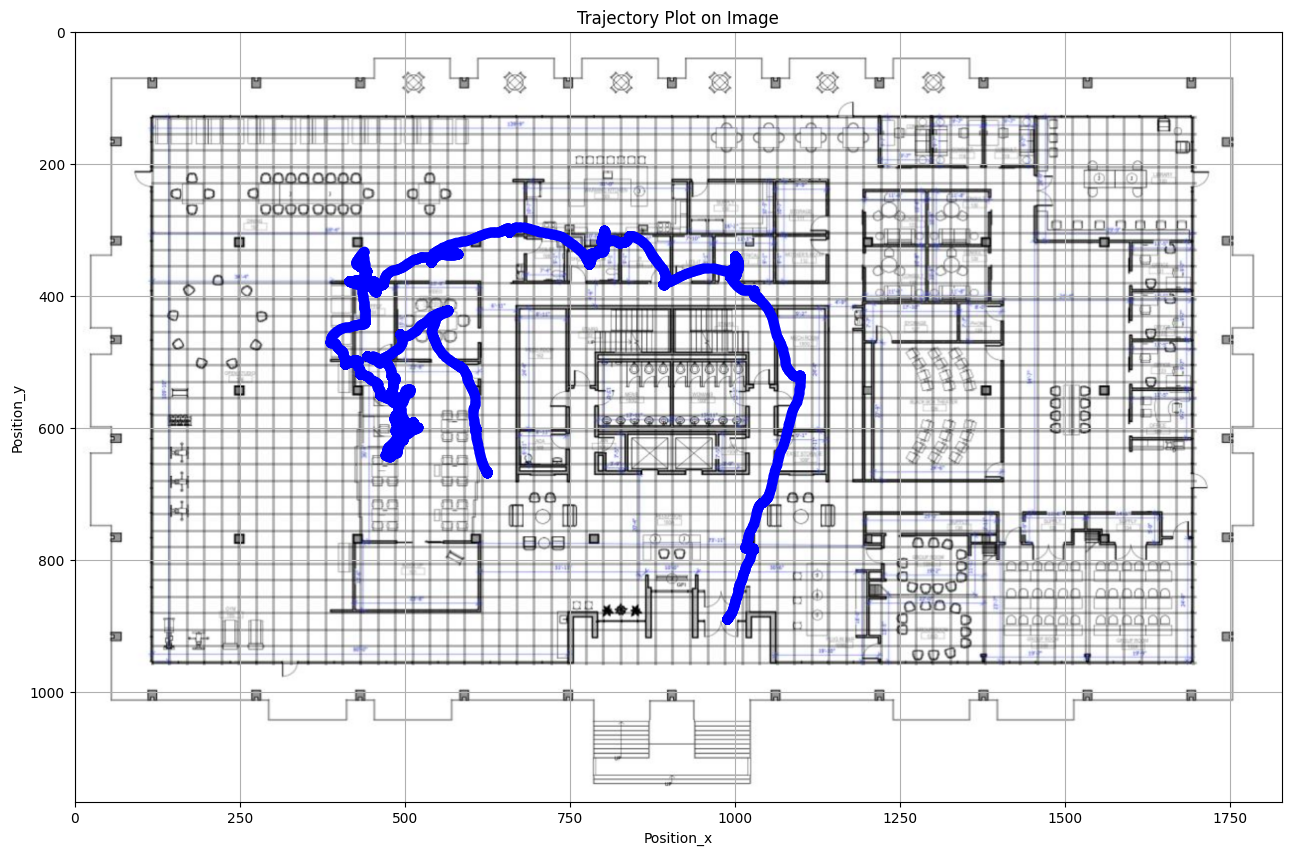

In [130]:
# Plot the trajectory on the image

# position_x = d_imu['Position_x'].to_numpy()/33.4772*(955 - 130) 
# position_y = d_imu['Position_y'].to_numpy()/33.4772*(955 - 130)

# position_x = position_x + 625 #(712, 590)
# position_y = position_y + 669 #(712, 590)

plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.plot(position_x, position_y, marker='o', linestyle='-', color='b')
plt.title('Trajectory Plot on Image')
plt.xlabel('Position_x')
plt.ylabel('Position_y')
plt.grid(True)
plt.show()

In [107]:
dataframe_ble['x_smoothed'].values[0]

922.0

In [68]:
    xEst = initial_state_mean
    PEst = initial_state_covariance

    state_means = []
    current_state_mean = initial_state_mean
    current_state_covariance = initial_state_covariance

    previous_timestamp = combined_data['Time_sec'].iloc[0]

    for i, row in combined_data.iterrows():
        current_timestamp = row['Time_sec']
        dt = current_timestamp - previous_timestamp
        previous_timestamp = current_timestamp
        
        if not (np.isnan(row['x_smoothed']) and np.isnan(row['y_smoothed'])):
            # BLE observation
            observation = np.array([row['x_smoothed'], row['y_smoothed']]).reshape(-1, 1)
            xEst, PEst = kalman_filter(xEst, PEst, observation, np.zeros((2, 1)), dt, observation_model_position, R_position)
        if not (np.isnan(row['Velocity_new_x']) and np.isnan(row['Velocity_new_y'])):
            # IMU observation
            observation = np.array([row['Velocity_new_x'], row['Velocity_new_y']]).reshape(-1, 1)/33.4772*(955 - 130) 
            xEst, PEst = kalman_filter(xEst, PEst, observation, np.zeros((2, 1)), dt, observation_model_velocity, R_velocity)
        
        state_means.append(xEst.flatten())

    # Convert results to DataFrame
    state_means = np.array(state_means)

In [56]:
# observation_matrix_velocity = np.array([[0, 0, 1, 0],
#                                         [0, 0, 0, 1]])
# observation = np.array([5,7])
# observation*observation_matrix_velocity

In [69]:
state_means[:, 0]

array([ 922.        , 1041.44177248, 1089.5238023 , ...,  743.95174633,
        756.07826293,  791.82612473])

In [236]:
from numpy import linalg as LA
class KalmanFilter(object):
    def __init__(self, dt, transition_matrix, transition_covariance, observation_matrix_position, observation_matrix_velocity, observation_covariance_position, observation_covariance_velocity, initial_state_mean, initial_state_covariance):
        """
        :param dt: sampling time (time for 1 cycle)
        :param u_x: acceleration in x-direction
        :param u_y: acceleration in y-direction
        :param std_acc: process noise magnitude
        :param x_std_meas: standard deviation of the measurement in x-direction
        :param y_std_meas: standard deviation of the measurement in y-direction
        :param vx_std_meas: standard deviation of the measurement in x-velocity
        :param vy_std_meas: standard deviation of the measurement in y-velocity
        """
        # Define sampling time
        self.dt = dt

        # Define the control input variables
        self.u = np.matrix([[0], [0]])

        # Initial State
        self.x = np.matrix(initial_state_mean).reshape(-1, 1)

        # Define the State Transition Matrix A
        self.A = np.array(transition_matrix)

        # Define the Control Input Matrix B
        self.B = np.matrix([[(self.dt ** 2) / 2, 0],
                            [0, (self.dt ** 2) / 2],
                            [self.dt, 0],
                            [0, self.dt]])

        # Define Measurement Mapping Matrices
        self.H_position = np.array(observation_matrix_position)
        self.H_velocity = np.array(observation_matrix_velocity)

        # Initial Process Noise Covariance
        self.Q = np.array(transition_covariance)

        # Initial Measurement Noise Covariances
        self.R_position = np.array(observation_covariance_position)
        self.R_velocity = np.array(observation_covariance_velocity)

        # Initial Covariance Matrix
        self.P = np.array(initial_state_covariance)


    def predict(self, dt):
        # Define the State Transition Matrix A
        std_acc=0.0005
        self.A = np.matrix([[1, 0, dt, 0],
                            [0, 1, 0, dt],
                            [0, 0, 1, 0],
                            [0, 0, 0, 1]])
        
        # Initial Process Noise Covariance
        self.Q = np.matrix([[(dt ** 4) / 4, 0, (dt ** 3) / 2, 0],
                            [0, (dt ** 4) / 4, 0, (dt ** 3) / 2],
                            [(dt ** 3) / 2, 0, dt ** 2, 0],
                            [0, (dt ** 3) / 2, 0, dt ** 2]]) * std_acc ** 2

        # Update time state
        self.x = np.dot(self.A, self.x) + np.dot(self.B, self.u)

        # Calculate error covariance
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        return self.x[0:2]

    def update_position(self, z):
        # Measurement Update for Position
        S = np.dot(self.H_position, np.dot(self.P, self.H_position.T)) + self.R_position
        K = np.dot(np.dot(self.P, self.H_position.T), np.linalg.inv(S))
        change_x = np.dot(K, (z - np.dot(self.H_position, self.x)))
        #print(LA.norm(change_x))
        if LA.norm(change_x)<200:
            self.x = self.x + change_x
        I = np.eye(self.H_position.shape[1])
        self.P = (I - (K * self.H_position)) * self.P
        return self.x[0:2]

    def update_velocity(self, z):
        # Measurement Update for Velocity
        S = np.dot(self.H_velocity, np.dot(self.P, self.H_velocity.T)) + self.R_velocity
        K = np.dot(np.dot(self.P, self.H_velocity.T), np.linalg.inv(S))
        change_x = np.dot(K, (z - np.dot(self.H_velocity, self.x)))
        if LA.norm(change_x)<100:
            self.x = self.x + change_x
        
        I = np.eye(self.H_velocity.shape[1])
        self.P = (I - (K * self.H_velocity)) * self.P
        return self.x[0:2]

In [237]:
    # Initialize Kalman Filter parameters
    transition_matrix = np.array([[1, 0, 1, 0],
                                  [0, 1, 0, 1],
                                  [0, 0, 1, 0],
                                  [0, 0, 0, 1]])

    transition_covariance = np.eye(4) * 0.05

    observation_matrix_position = np.array([[1, 0, 0, 0],
                                            [0, 1, 0, 0]])

    observation_matrix_velocity = np.array([[0, 0, 1, 0],
                                            [0, 0, 0, 1]])

    observation_covariance_position = np.eye(2) * 1
    observation_covariance_velocity = np.eye(2) * 0.1

    initial_state_mean = np.array([dataframe_ble['x_smoothed'].values[1], 
                                   dataframe_ble['y_smoothed'].values[1], 
                                   0, 
                                   0])

    initial_state_covariance = np.array([[0.001, 0, 0, 0],
                                  [0, 0.001, 0, 0],
                                  [0, 0, 1, 0],
                                  [0, 0, 0, 1]])
    

In [238]:
    kf = KalmanFilter(dt,  transition_matrix, transition_covariance, observation_matrix_position, observation_matrix_velocity, observation_covariance_position, observation_covariance_velocity, initial_state_mean, initial_state_covariance)

    
    state_means = []
    current_state_mean = initial_state_mean
    current_state_covariance = initial_state_covariance

    previous_timestamp = combined_data['Time_sec'].iloc[0]
    time_means = []
    for i, row in combined_data.iterrows():
        current_timestamp = row['Time_sec']
        dt = current_timestamp - previous_timestamp
        previous_timestamp = current_timestamp
        # Predict step
        kf.predict(dt)
        
        if not (np.isnan(row['x_smoothed']) and np.isnan(row['y_smoothed'])):
            # BLE observation
            observation = np.array([row['x_smoothed'], row['y_smoothed']]).reshape(-1, 1)
            kf.update_position(observation)
            
        if not (np.isnan(row['Velocity_new_x']) and np.isnan(row['Velocity_new_y'])):
            # IMU observation
            observation = np.array([row['Velocity_new_x'], row['Velocity_new_y']]).reshape(-1, 1)/33.4772*(955 - 130) 
            kf.update_velocity(observation)
            
        state_means.append(np.squeeze(np.asarray( kf.x.flatten() )))
        time_means.append(current_timestamp)
      

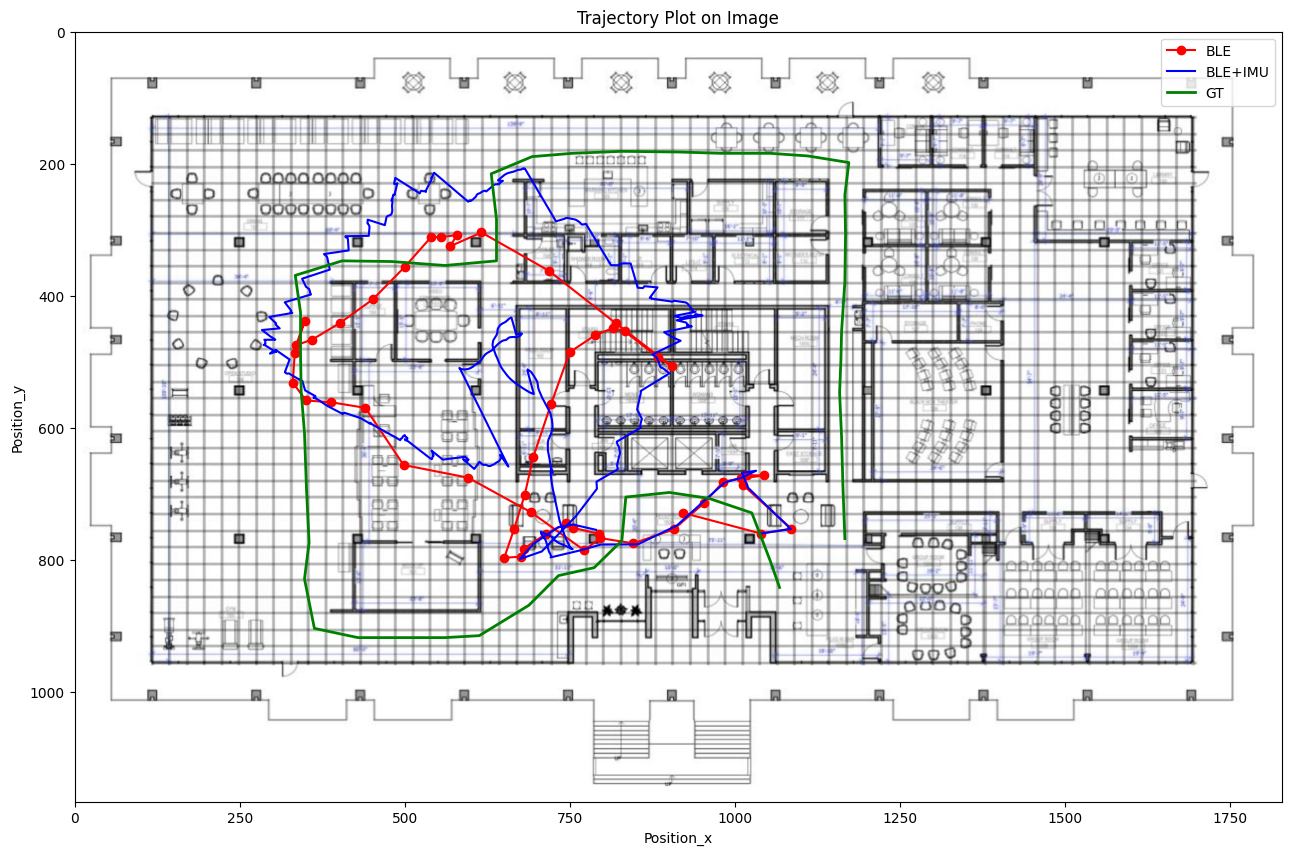

In [250]:
state_means = np.array(state_means)
time_means = np.array(time_means)

plt.figure(figsize=(20, 10))
plt.imshow(img)

plt.plot(dataframe_ble['x_smoothed'], dataframe_ble['y_smoothed'], marker='o', linestyle='-', color='r',label='BLE')
plt.plot(state_means[:, 0], state_means[:, 1],  linestyle='-', color='b',label='BLE+IMU')
plt.plot(arr_gt_scaled[:, 0], arr_gt_scaled[:, 1], linewidth=2, linestyle='-', color='g',label='GT',)

plt.title('Trajectory Plot on Image')
plt.xlabel('Position_x')
plt.ylabel('Position_y')
#plt.grid(True)
plt.legend()
plt.show()

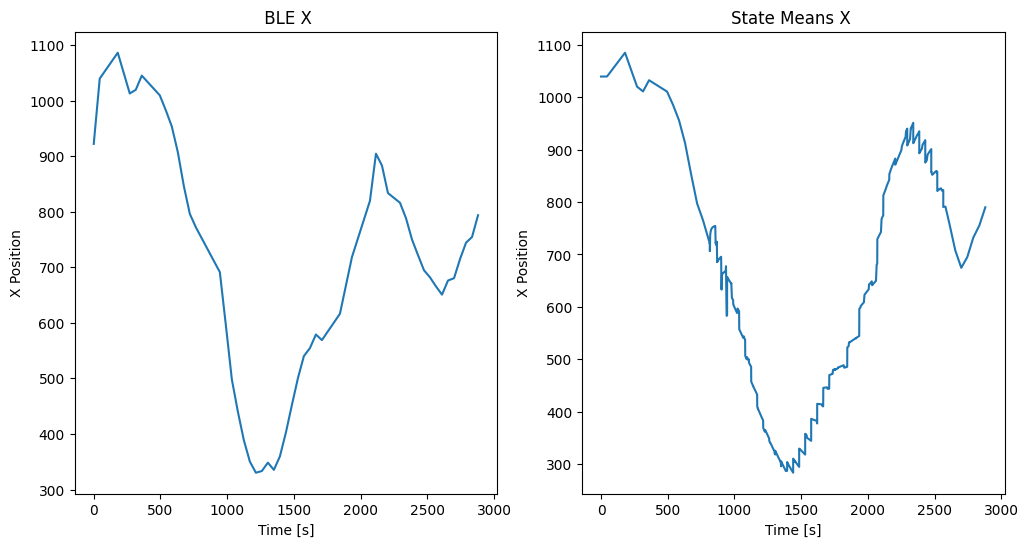

In [240]:
    # Plot the results side by side horizontally
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].plot(dataframe_ble['Time_sec'], dataframe_ble['x_smoothed'], label='Smoothed X')
    #axes[0].scatter(dataframe_ble['timestamp'], dataframe_ble['x_smoothed'], label='BLE X', c='r')
    axes[0].set_title(' BLE X')
    axes[0].set_xlabel('Time [s]')
    axes[0].set_ylabel('X Position')
    #axes[0].legend()

    axes[1].plot(time_means, state_means[:, 0], label='State Means X')
    #axes[1].plot(dataframe_ble['x_smoothed'], label='BLE X')
    axes[1].set_title('State Means X ')
    axes[1].set_xlabel('Time [s]')
    axes[1].set_ylabel('X Position')
    #axes[1].legend()

    #plt.tight_layout()
    plt.show()

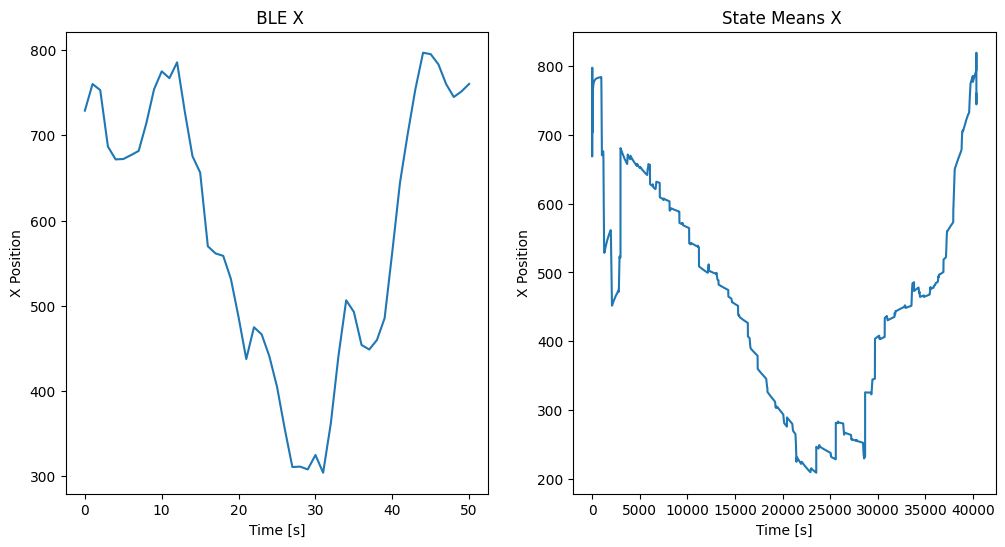

In [177]:
    # Plot the results side by side horizontally
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].plot(dataframe_ble['y_smoothed'], label='Smoothed X')
    #axes[0].scatter(dataframe_ble['timestamp'], dataframe_ble['x_smoothed'], label='BLE X', c='r')
    axes[0].set_title(' BLE X')
    axes[0].set_xlabel('Time [s]')
    axes[0].set_ylabel('X Position')
    #axes[0].legend()

    axes[1].plot(state_means[:, 1], label='State Means X')
    #axes[1].plot(dataframe_ble['x_smoothed'], label='BLE X')
    axes[1].set_title('State Means X ')
    axes[1].set_xlabel('Time [s]')
    axes[1].set_ylabel('X Position')
    #axes[1].legend()

    #plt.tight_layout()
    plt.show()

In [244]:
arr = [(712, 590), (712, 590), (703, 562), (684, 511), (641, 495), (601, 489), (557, 494), (553, 540), (525, 569), (525, 569), (489, 577), (459, 609), (409, 641), (374, 643), (336, 643), (286, 643), (242, 633), (232, 581), (237, 542), (234, 485), (232, 426), (229, 382), (228, 342), (228, 298), (223, 259), (270, 243), (320, 244), (374, 248), (426, 243), (426, 199), (426, 199), (421, 151), (462, 133), (503, 129), (552, 127), (610, 128), (653, 129), (703, 129), (741, 132), (782, 139), (778, 173), (779, 215), (778, 265), (775, 318), (775, 318), (774, 348), (773, 383), (775, 430), (776, 482), (776, 482), (778, 538)]

arr_gt = np.array(arr)

img_loc='ep6_floorplan_measured_half_gridded_1_meter.jpg'
original_image = cv2.imread(img_loc)
original_height, original_width = original_image.shape[:2]

# New dimensions after resizing
new_width = 610 * 3
new_height = 389 * 3

# Calculate scaling factors
scale_x = new_width / original_width
scale_y = new_height / original_height

# Scale the ground truth coordinates
arr_gt_scaled = arr_gt.copy()
arr_gt_scaled[:, 0] = arr_gt[:, 0] * scale_x
arr_gt_scaled[:, 1] = arr_gt[:, 1] * scale_y

In [252]:
len(arr_gt_scaled)

51

In [ ]:
dataframe_ble = d_ble[['Time_sec', 'x_smoothed', 'y_smoothed']].copy()
dataframe_imu = d_imu[['Time_sec', 'Velocity_new_x', 'Velocity_new_y']].copy()



# Merge the two dataframes based on timestamps, using interpolation for missing values
combined_df = pd.merge_asof(dataframe_ble.sort_values('Time_sec'), 
                            dataframe_imu.sort_values('Time_sec'), 
                            on='Time_sec', 
                            direction='nearest')

# Fill any NaN values (if any) that might result from merging
combined_df = combined_df.interpolate(method='linear')

# Ensure all required columns are present
combined_df = combined_df[['Time_sec', 'x_smoothed', 'y_smoothed', 'Velocity_new_x', 'Velocity_new_y']]


In [254]:
d_ble['Time_sec'].values

array([   0.,   45.,  180.,  270.,  315.,  360.,  495.,  540.,  585.,
        630.,  675.,  720.,  765.,  945.,  990., 1035., 1080., 1125.,
       1170., 1215., 1260., 1305., 1350., 1395., 1440., 1485., 1530.,
       1575., 1620., 1665., 1710., 1845., 1935., 2070., 2115., 2160.,
       2205., 2295., 2340., 2385., 2430., 2475., 2520., 2565., 2610.,
       2655., 2700., 2745., 2790., 2835., 2880.])

In [261]:
    # Sample DataFrames with BLE and IMU data
dataframe_ekf = pd.DataFrame({
        'timestamp': time_means,
        'x_ekf': state_means[:, 0],
        'y_ekf': state_means[:, 1]
    })
dataframe_gt = pd.DataFrame({
        'timestamp': d_ble['Time_sec'].values,
        'x_gt': arr_gt_scaled[:, 0],
        'y_gt': arr_gt_scaled[:, 1]
    })
    
# Merge the two dataframes based on timestamps, using interpolation for missing values
analysis_df = pd.merge_asof(dataframe_gt.sort_values('timestamp'), 
                            dataframe_ekf.sort_values('timestamp'), 
                            on='timestamp', 
                            direction='nearest')

# Fill any NaN values (if any) that might result from merging
analysis_df = analysis_df.interpolate(method='linear')

In [262]:
analysis_df

timestamp  x_gt  y_gt        x_ekf       y_ekf
0         0.0  1068   842  1039.486287  760.214069
1        45.0  1068   842  1039.603716  760.245268
2       180.0  1054   802  1084.955968  753.308361
3       270.0  1026   729  1020.301792  690.756532
4       315.0   961   707  1011.071405  668.292464
5       360.0   901   698  1032.467195  665.059784
6       495.0   835   705  1010.796282  675.518284
7       540.0   829   771   985.293965  682.796816
8       585.0   787   812   955.647490  709.024328
9       630.0   787   812   912.421778  748.077348
10      675.0   733   824   853.349177  776.587067
11      720.0   688   869   797.418414  776.922602
12      765.0   613   915   764.794547  786.049687
13      945.0   561   918   657.054919  658.789653
14      990.0   504   918   605.373514  662.387211
15     1035.0   429   918   557.851385  648.371761
16     1080.0   363   904   506.811377  621.623629
17     1125.0   348   829   457.632997  599.030466
18     1170.0   355   774   410.281988  577.945520
19     1215.0   351   692   369.355348  557.804363
20     1260.0   348   608   344.978448  528.997183
21     1305.0   343   545   325.576025  496.627055
22     1350.0   342   488   305.131377  484.533859
23     1395.0   342   425   303.843811  466.524938
24     1440.0   334   369   310.419689  449.303602
25     1485.0   405   347   329.521271  425.969982
26     1530.0   480   348   357.795923  397.977710
27     1575.0   561   354   386.370678  360.415380
28     1620.0   639   347   414.956816  331.296649
29     1665.0   639   284   445.443713  309.215434
30     1710.0   639   284   469.777215  292.889217
31     1845.0   631   215   522.682102  244.668966
32     1935.0   693   189   596.020637  257.450337
33     2070.0   754   184   728.977333  287.091105
34     2115.0   828   181   812.317173  353.529132
35     2160.0   915   182   852.878856  387.621922
36     2205.0   979   184   871.250347  403.052966
37     2295.0  1054   184   907.910253  430.629766
38     2340.0  1111   188   912.169730  437.007832
39     2385.0  1173   198   892.987794  455.169334
40     2430.0  1167   247   875.299608  488.865546
41     2475.0  1168   307   857.323863  544.400318
42     2520.0  1167   378   821.213221  620.900841
43     2565.0  1162   454   790.539102  681.564357
44     2610.0  1162   454   759.740635  733.525495
45     2655.0  1161   497   707.693706  787.383271
46     2700.0  1159   547   674.491745  798.848622
47     2745.0  1162   614   695.098315  775.812838
48     2790.0  1164   688   732.189831  750.839844
49     2835.0  1164   688   755.165433  746.619217
50     2880.0  1167   768   789.987042  754.694580

In [265]:
# Calculate the error (Euclidean distance)
analysis_df['ekf_error'] = np.sqrt((analysis_df['x_gt'] - analysis_df['x_ekf'])**2 + (analysis_df['y_gt'] - analysis_df['y_ekf'])**2)

# Calculate Mean Squared Error (MSE)
mse = np.mean(analysis_df['ekf_error']**2)

# Calculate average error
average_error = np.mean(analysis_df['ekf_error'])* 33.4772/(955 - 130) 

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Average error: {average_error}")

Mean Squared Error (MSE): 71532.70396156932
Average error: 9.219847562516268
